In [15]:
# general imports
import numpy as np
import matplotlib.pyplot as plt

# ppr imports
from ppr.robot import Robot_3R
from ppr.path import TrajectoryPt, TolerancedNumber, TrajectoryPtLineTol
from ppr.geometry import Rectangle
from ppr.path import cart_to_joint
from ppr.path import get_shortest_path
from ppr.optim import get_optimal_trajectory, Solver

In [41]:
# ROBOT
robot1 = Robot_3R([2, 2, 2])

# PATH
t = np.linspace(0, np.pi/2, 6); R = 3;
angle = TolerancedNumber(0.0, -np.pi/2, np.pi/2, samples=10)

path1 = []
for ti in t:
    xin = R * np.cos(ti)
    xi = TolerancedNumber(xin, xin-0.5, xin+0.3, samples=6)
    pi = [xi, R * np.sin(ti), angle]
    path1.append(TrajectoryPt(pi))

# TUBE PATH
v = TolerancedNumber(0, -0.5, 0.3, samples=6)
path2 = []
for ti in t:
    pi = [R * np.cos(ti), R * np.sin(ti), angle]
    path2.append(TrajectoryPtLineTol(pi, v, ti))

# COLLISION SCENE
sc2 = [Rectangle(-2, 1, 1.5, 1, -0.1)]
sc1 = [Rectangle(3, 1.3, 2, 1, -0.1),
       Rectangle(3, 0.5, 2, 0.3, 0)]

converting type of Q
[79 68 57 45 23 13]
True


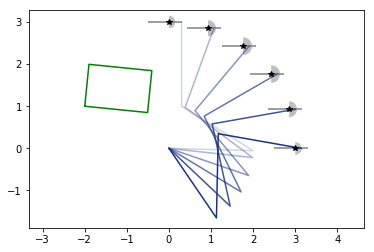

In [42]:
path_js = cart_to_joint(robot1, path1, check_collision=True, scene=sc2)
sol = get_shortest_path(path_js)
print(sol['success'])

fig2, ax2 = plt.subplots()
ax2.axis('equal')
robot1.plot_path_kinematics(ax2, sol['path'])
for r in sc2: r.plot(ax2, 'g')
for tp in path1: tp.plot(ax2)
plt.show()

In [44]:
for tp in path2:
    print(tp.discretise())

[[ 2.5   2.66  2.82  2.98  3.14  3.3 ]
 [ 0.    0.    0.    0.    0.    0.  ]]
[[ 2.37764129  2.52981033  2.68197938  2.83414842  2.98631746  3.1384865 ]
 [ 0.77254249  0.82198521  0.87142792  0.92087064  0.97031336  1.01975608]]
[[ 2.02254249  2.15198521  2.28142792  2.41087064  2.54031336  2.66975608]
 [ 1.46946313  1.56350877  1.65755441  1.75160005  1.84564569  1.93969133]]
[[ 1.46946313  1.56350877  1.65755441  1.75160005  1.84564569  1.93969133]
 [ 2.02254249  2.15198521  2.28142792  2.41087064  2.54031336  2.66975608]]
[[ 0.77254249  0.82198521  0.87142792  0.92087064  0.97031336  1.01975608]
 [ 2.37764129  2.52981033  2.68197938  2.83414842  2.98631746  3.1384865 ]]
[[  1.53080850e-16   1.62878024e-16   1.72675199e-16   1.82472373e-16
    1.92269547e-16   2.02066722e-16]
 [  2.50000000e+00   2.66000000e+00   2.82000000e+00   2.98000000e+00
    3.14000000e+00   3.30000000e+00]]


converting type of Q
[0 1 3 1 1 0]
True


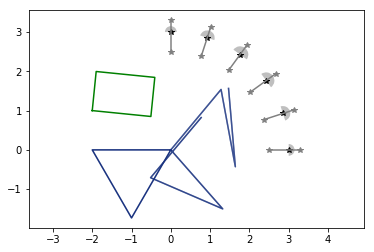

In [43]:
path_js = cart_to_joint(robot1, path2, check_collision=True, scene=sc2)
sol2 = get_shortest_path(path_js)
print(sol2['success'])

fig2, ax2 = plt.subplots()
ax2.axis('equal')
robot1.plot_path_kinematics(ax2, sol2['path'])
for r in sc2: r.plot(ax2, 'g')
for tp in path2: tp.plot(ax2)
plt.show()

In [4]:
q_init = sol['path']
q_opt, dq_opt, ddq_opt = get_optimal_trajectory(robot1, path1, q_init, check_collision=True, scene=sc2)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.9799067410855886
            Iterations: 69
            Function evaluations: 2285
            Gradient evaluations: 65


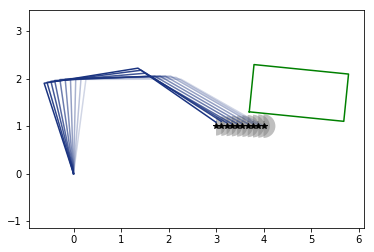

In [5]:
fig3, ax3 = plt.subplots()
ax3.axis('equal')
robot1.plot_path_kinematics(ax3, q_opt)
for r in sc2: r.plot(ax3, 'g')
for tp in path1: tp.plot(ax3)
plt.show()

## Test Solver class

In [6]:
solver = Solver(robot1, path1, sc2)
solver.add_path_constraints()
solver.add_collision_constaints()

In [7]:
q_init = sol['path']
sol2 = solver.run(q_init)
sol2['success']

True

In [8]:
from ppr.optim import reshape_path_vector

_, q_sol = reshape_path_vector(sol2['x'])
q_sol

array([[ 1.88500808, -1.72563082, -0.76571394],
       [ 1.85372626, -1.72558816, -0.69623802],
       [ 1.81128964, -1.72557211, -0.63487446],
       [ 1.77048657, -1.7255552 , -0.56849665],
       [ 1.71446957, -1.67915898, -0.55890909],
       [ 1.65874028, -1.62987164, -0.55246706],
       [ 1.60316788, -1.57764128, -0.54912514],
       [ 1.54761111, -1.52233973, -0.54886986],
       [ 1.49217443, -1.47658474, -0.5391882 ],
       [ 1.43994205, -1.43749919, -0.51900486]])

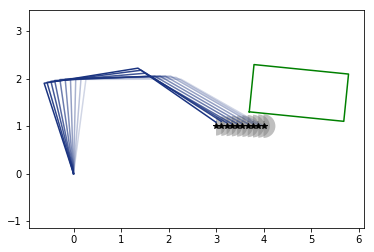

In [9]:
fig3, ax3 = plt.subplots()
ax3.axis('equal')
robot1.plot_path_kinematics(ax3, q_sol)
for r in sc2: r.plot(ax3, 'g')
for tp in path1: tp.plot(ax3)
plt.show()

## Tube constraints

In [10]:
solver = Solver(robot1, path1, sc2)
solver.add_path_constraints()
solver.add_collision_constaints()
solver.add_tube_constraints()

In [11]:
q_init = sol['path']
sol2 = solver.run(q_init)
sol2['success']

False

In [12]:
sol2

     fun: 1.0036358833312988
     jac: array([ 1., -1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0., -1.,  1.,  1.])
 message: 'Singular matrix C in LSQ subproblem'
    nfev: 32
     nit: 1
    njev: 1
  status: 6
 success: False
       x: array([ 1.93819451, -1.82119286, -0.6406005 ,  1.88363671, -1.81003344,
       -0.59720194,  1.82749546, -1.78221333, -0.56888098,  1.77047217,
       -1.72558796, -0.56848294,  1.71446991, -1.67915928, -0.55890942,
        1.65874064, -1.62987196, -0.55246741,  1.60316825, -1.57764161,
       -0.54912549,  1.54761147, -1.52234006, -0.54887021,  1.49217474,
       -1.47658503, -0.5391885 ,  1.43637657, -1.42735577, -0.53261966])